In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
df = pd.read_csv('csv/book_info_complete.csv')
df.head()

,title,description,plot,csm_review,need_to_know,par_rating,kids_rating,csm_rating,Author,Genre,...,Publisher's recommended age(s),Number of pages,Available on,Last updated,Illustrator,Authors,Awards,Publishers,Award,Illustrators
0,The Third Twin,Gripping thriller skimps on character developm...,"Twins Ava and Alexa ""Lexi"" Rios live in an aff...","THE THIRD TWIN has an interesting, compelling ...",Parents need to know that The Third Twin is a ...,17.0,14.0,12,CJ Omololu,Mystery,...,12 - 18,336.0,"Nook, Hardback, iBooks, Kindle","June 19, 2019",NaN,NaN,NaN,NaN,NaN,NaN
1,Small Damages,Luminous story of pregnant teen's summer in Sp...,"It's the summer of 1996, which 18-year-old Ken...",This could well have been a minefield of clich...,Parents need to know that Small Damages is nar...,NaN,14.0,14,Beth Kephart,Coming of Age,...,14 - 17,304.0,"Nook, Hardback, iBooks, Kindle","May 06, 2019",NaN,NaN,NaN,NaN,NaN,NaN
2,"The School for Good and Evil, Book 1",Fractured fairy tale has plenty of twists for ...,When best friends Sophie and Agatha are stolen...,The School for Good and Evil is no run-of-the-...,Parents need to know that The School for Good ...,11.0,11.0,8,Soman Chainani,Fairy Tale,...,8 - 17,496.0,"Nook, Audiobook (unabridged), Hardback, iBooks...","October 18, 2017",Iacopo Bruno,NaN,NaN,NaN,NaN,NaN
3,"Agent of Chaos: The X-Files Origins, Book 1","Series pictures Mulder as teen, captures essen...","Set in 1979, AGENT OF CHAOS follows a 17-year-...",Popular TV characters don't always make a smoo...,Parents need to know that Agent of Chaos: The ...,NaN,NaN,13,Kami Garcia,Science Fiction,...,14 - 18,320.0,"Nook, Audiobook (abridged), Hardback, iBooks, ...","June 19, 2019",NaN,NaN,NaN,NaN,NaN,NaN
4,Crossing Ebenezer Creek,Heartbreaking novel follows freed slaves on Sh...,CROSSING EBENEZER CREEK is a YA novel from awa...,"Beautifully written and poetically rendered, t...",Parents need to know that Crossing Ebenezer Cr...,NaN,NaN,13,Tonya Bolden,Historical Fiction,...,NaN,240.0,"Nook, Audiobook (unabridged), Hardback, Kindle","January 18, 2019",NaN,NaN,NaN,NaN,NaN,NaN


## Create train/test split

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

In [4]:
for train_index, test_index in split.split(df, df['csm_rating']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

## Drop Duplicates

In [5]:
duplicateRowsTrain = train_set[train_set.duplicated()]
duplicateRowsTrain

,title,description,plot,csm_review,need_to_know,par_rating,kids_rating,csm_rating,Author,Genre,...,Publisher's recommended age(s),Number of pages,Available on,Last updated,Illustrator,Authors,Awards,Publishers,Award,Illustrators
812,Stone Rabbit Series,"Time-travel comic mixes cartoon mayhem, some l...",Stone Rabbit is just living an ordinary life -...,"This funny, silly comic book series is a good ...",Parents need to know that although there's qui...,NaN,6.0,7,Erik Craddock,Humor,...,7 - 10,96.0,NaN,"July 22, 2019",Erik Craddock,NaN,NaN,NaN,NaN,NaN


In [6]:
train_set.drop(812, inplace=True)

In [7]:
duplicateRowsTrain = train_set[train_set.duplicated()]
len(duplicateRowsTrain)

0

In [8]:
duplicateRowsTest = test_set[test_set.duplicated()]
len(duplicateRowsTest)

0

In [9]:
test_set['csm_rating'].value_counts() / len(test_set)

4     0.135739
14    0.109966
9     0.107388
8     0.103093
13    0.096220
10    0.096220
12    0.086770
3     0.048110
15    0.037801
6     0.037801
11    0.034364
5     0.034364
7     0.029210
2     0.024914
16    0.015464
17    0.002577
Name: csm_rating, dtype: float64

In [10]:
train_set['csm_rating'].value_counts() / len(train_set)

4     0.135455
14    0.109869
9     0.107074
8     0.103204
10    0.096538
13    0.096538
12    0.086433
3     0.048592
15    0.037841
6     0.037626
5     0.034186
11    0.033971
7     0.028811
2     0.025371
16    0.015266
17    0.003225
Name: csm_rating, dtype: float64

In [11]:
train_set.head(2)

,title,description,plot,csm_review,need_to_know,par_rating,kids_rating,csm_rating,Author,Genre,...,Publisher's recommended age(s),Number of pages,Available on,Last updated,Illustrator,Authors,Awards,Publishers,Award,Illustrators
5779,"Bloodhound: Beka Cooper, Book 2",Second book in fantasy series is more mature t...,"BLOODHOUND finds young policewoman -- aka ""Dog...","Like its predecessor, Terrier, Bloodhound is m...",Parents need to know that this fantasy/crime s...,13.0,12.0,12,Tamora Pierce,Fantasy,...,12 - 17,550.0,NaN,"June 19, 2019",NaN,NaN,NaN,NaN,NaN,NaN
2,"The School for Good and Evil, Book 1",Fractured fairy tale has plenty of twists for ...,When best friends Sophie and Agatha are stolen...,The School for Good and Evil is no run-of-the-...,Parents need to know that The School for Good ...,11.0,11.0,8,Soman Chainani,Fairy Tale,...,8 - 17,496.0,"Nook, Audiobook (unabridged), Hardback, iBooks...","October 18, 2017",Iacopo Bruno,NaN,NaN,NaN,NaN,NaN


## Save Train and Test Sets

In [12]:
train_set.to_csv('csv/train.csv', index=False, float_format = '%.12g')
test_set.to_csv('csv/test.csv', index=False, float_format= '%.12g')

## EDA

/home/evan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/evan/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


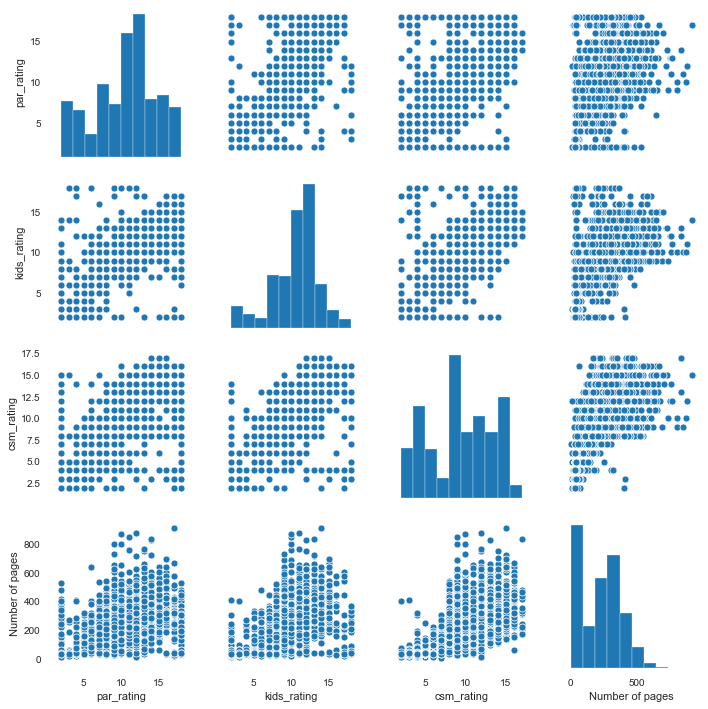

In [13]:
sns.pairplot(train_set);

In [14]:
profile = ProfileReport(train_set.reset_index(drop=True), title='Pandas Profiling Report', html={'style':{'full_width':True}}, correlations={"cramers": {"calculate": False}})

In [15]:
!mkdir lexile/reports

mkdir: cannot create directory ‘lexile/reports’: File exists


In [16]:
profile.to_file(output_file="lexile/reports/train_eda.html")